In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# figure setting #
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

In [9]:
traj = pd.read_csv('./ca_pos.txt',sep = ' ',header=None).values[:,2:-1]
traj_n = pd.read_csv('./ca_n.txt',sep = ' ',header=None).values[:,2:-1]

In [10]:
total_traj = []
for i in range(20):
    total_traj.append(traj[0+76*i:76+76*i,:])
total_traj = np.array(total_traj)
av_pos = np.mean(total_traj,axis=0)
vec_list = total_traj - av_pos
ccm_ref = np.zeros((76,76))
ccm = np.zeros((76,76))
for i in range(vec_list.shape[0]):
    ccm_ref += np.tensordot(vec_list[i],vec_list[i].T,axes=([1],[0]))

for i in range(76):
    ccm[i,:] = np.diagonal(ccm_ref)*ccm_ref[i,i]

real_ccm = ccm_ref/(ccm)**0.5
np.save("../md.npy",real_ccm)

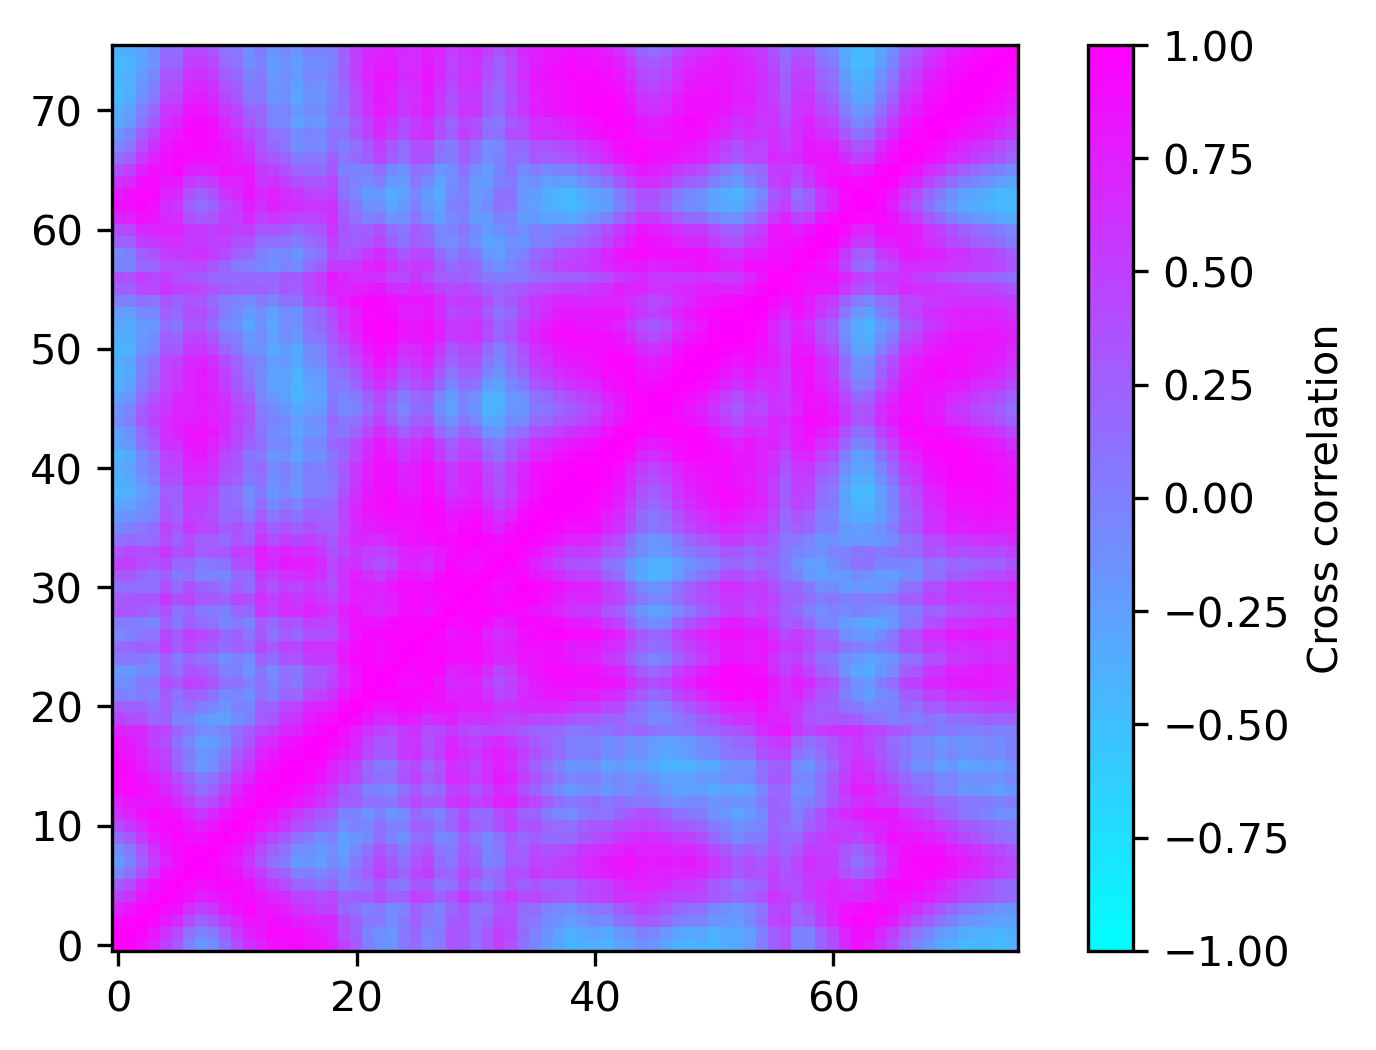

In [11]:
fig, ax = plt.subplots()
im = ax.imshow(real_ccm,vmin=-1, vmax=1, cmap='cool')
fig.colorbar(im, ax=ax, label='Cross correlation')
ax.invert_yaxis()
plt.savefig('../result/MD.png',bbox_inches='tight')
plt.show()

In [12]:
total_traj_n = []
for i in range(20):
    total_traj_n.append(traj_n[0+76*i:76+76*i,:])
total_traj_n = np.array(total_traj_n)
av_pos_n = np.mean(total_traj_n,axis=0)
vec_list_n = total_traj_n - av_pos_n
ccm_ref_n = np.zeros((76,76))
ccm_n = np.zeros((76,76))
for i in range(vec_list_n.shape[0]):
    ccm_ref_n += np.tensordot(vec_list_n[i],vec_list_n[i].T,axes=([1],[0]))

for i in range(76):
    ccm_n[i,:] = np.diagonal(ccm_ref_n)*ccm_ref_n[i,i]

real_ccm_n = ccm_ref_n/(ccm_n)**0.5
np.save("../md_n.npy",real_ccm_n)

In [13]:
real_ccm

array([[ 1.        ,  0.98090817,  0.88796273, ..., -0.42547316,
        -0.45675323, -0.38622352],
       [ 0.98090817,  1.        ,  0.94401144, ..., -0.36967427,
        -0.41877871, -0.35643919],
       [ 0.88796273,  0.94401144,  1.        , ..., -0.20930159,
        -0.28470429, -0.26815732],
       ...,
       [-0.42547316, -0.36967427, -0.20930159, ...,  1.        ,
         0.97321627,  0.91836979],
       [-0.45675323, -0.41877871, -0.28470429, ...,  0.97321627,
         1.        ,  0.95842945],
       [-0.38622352, -0.35643919, -0.26815732, ...,  0.91836979,
         0.95842945,  1.        ]])

In [14]:
real_ccm_n

array([[ 1.        ,  0.66083857,  0.53503818, ...,  0.27296351,
        -0.0221086 ,  0.07329368],
       [ 0.66083857,  1.        ,  0.71512757, ...,  0.18063152,
        -0.0370181 ,  0.09878384],
       [ 0.53503818,  0.71512757,  1.        , ...,  0.18982383,
         0.12692533,  0.19618062],
       ...,
       [ 0.27296351,  0.18063152,  0.18982383, ...,  1.        ,
         0.63222369,  0.26176691],
       [-0.0221086 , -0.0370181 ,  0.12692533, ...,  0.63222369,
         1.        ,  0.51918651],
       [ 0.07329368,  0.09878384,  0.19618062, ...,  0.26176691,
         0.51918651,  1.        ]])

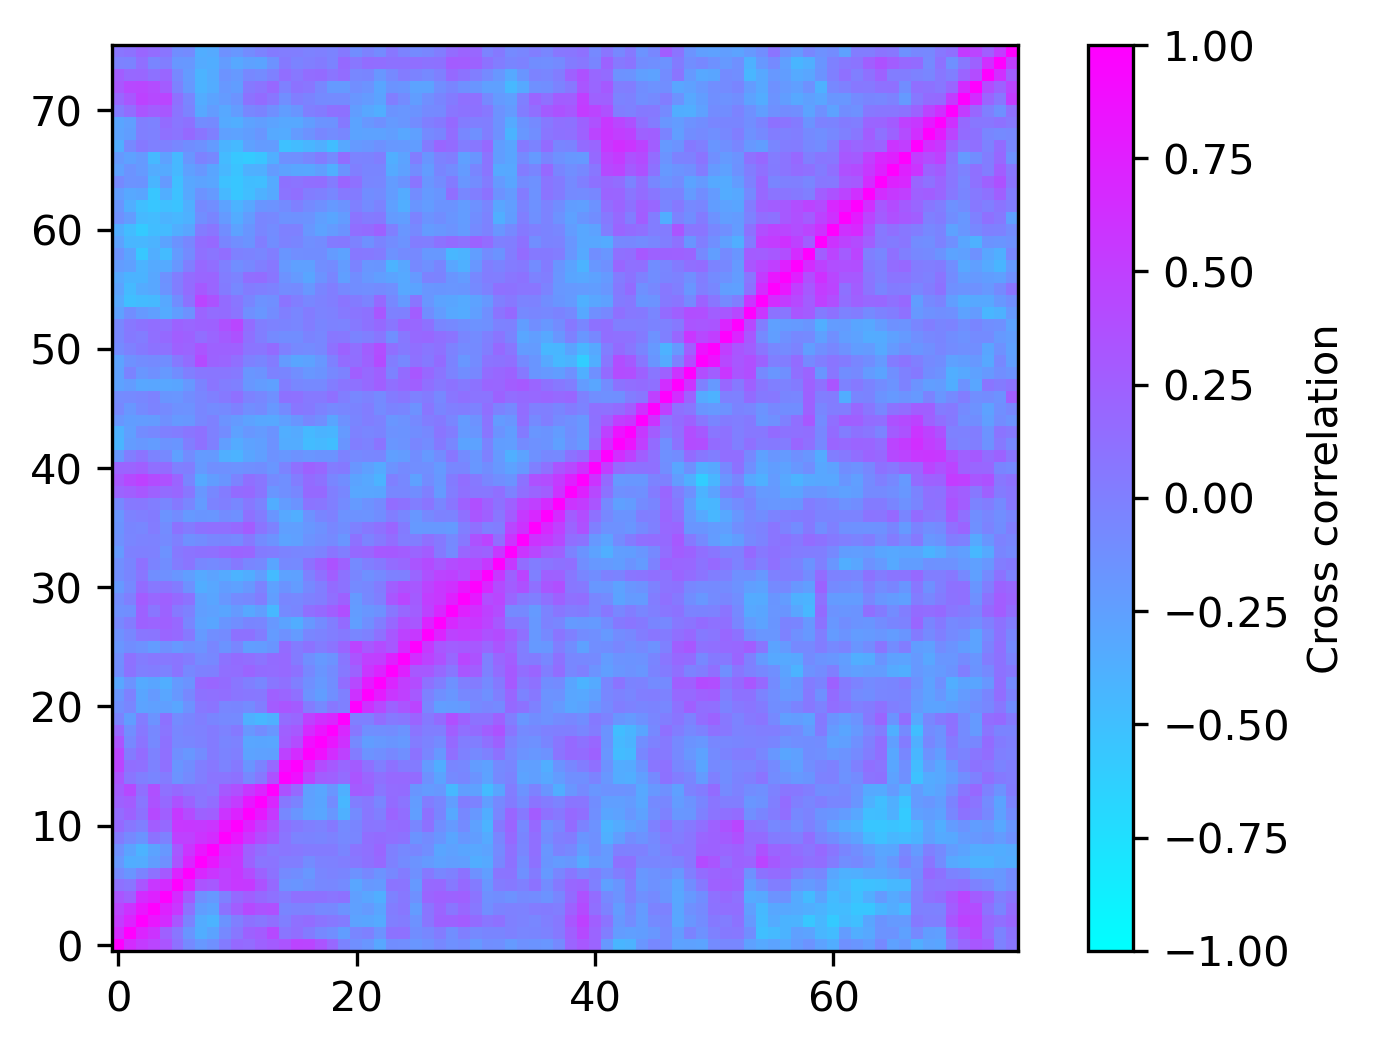

In [15]:
fig, ax = plt.subplots()
im = ax.imshow(real_ccm_n,vmin=-1, vmax=1, cmap='cool')
fig.colorbar(im, ax=ax, label='Cross correlation')
ax.invert_yaxis()
plt.savefig('../result/MD_n.png',bbox_inches='tight')
plt.show()